In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-01-06 03:20:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-01-06 03:20:17 (125 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(units=120,return_sequences=True)))
model.add(Dropout(rate=0.4))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(total_words/2,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation="softmax"))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
print(model.summary())


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            205504    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 240)           177600    
_________________________________________________________________
dropout (Dropout)            (N

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 6.9203 - acc: 0.0229
Epoch 2/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.5119 - acc: 0.0226
Epoch 3/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.4200 - acc: 0.0231
Epoch 4/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.3073 - acc: 0.0281
Epoch 5/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.2201 - acc: 0.0333
Epoch 6/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.1452 - acc: 0.0367
Epoch 7/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.0695 - acc: 0.0406
Epoch 8/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 5.9846 - acc: 0.0431
Epoch 9/100
15462/15462 [==============================] - 

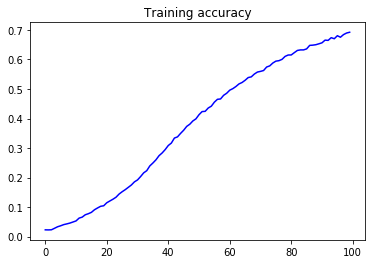

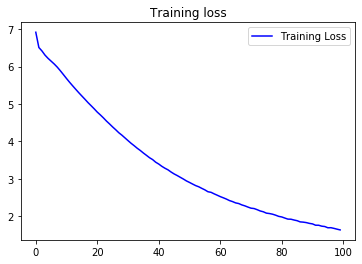

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
 
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope should give pleasure youth another short false heir eyes doth decay give pleasure gay gay days give light light eyes live so ' exceeds bearing spend wanting wide world's own face depends releasing eyes exceeds rare chary foes show heart thee still young thine true eyes be poor more was not thee still behold doth fear thy granting spent rehearse alone live alone grew so young true change mine eye is thine was thine eyes untrue still untrue more will be sit rare rare bright give thee young so change be view doth hide thee still thee away be too
